# ***Import Librarys***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## For preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder


####################
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


## Machine Learning Algorithm
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

## For Evaluation Model
from sklearn.metrics import accuracy_score

# ***Load DataSet***

In [2]:
data = pd.read_csv('../bodyPerformance.csv')

# ***Data Analysis***

In [3]:
data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [4]:
# The number of rows and columns
rows, columns = data.shape
print('Number of rows --> ', rows)
print('Number of columns --> ', columns)

Number of rows -->  13393
Number of columns -->  12


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [6]:
data.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


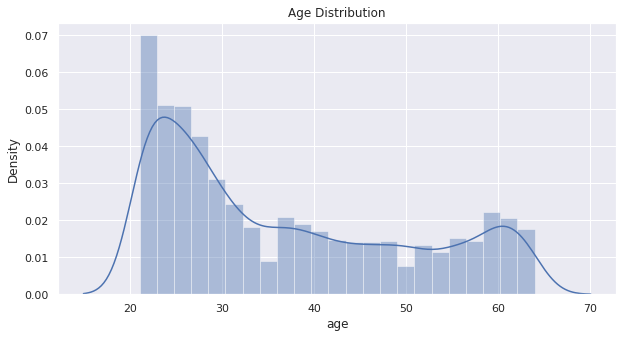

In [7]:
sns.set()
plt.figure(figsize=(10, 5))
plt.title('Age Distribution')
sns.distplot(data['age'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


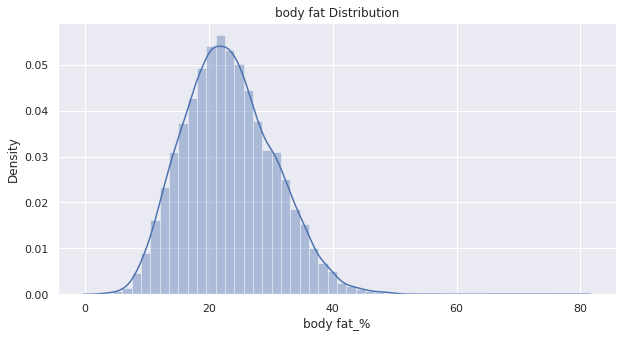

In [8]:
plt.figure(figsize=(10, 5))
plt.title('body fat Distribution')
sns.distplot(data['body fat_%'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


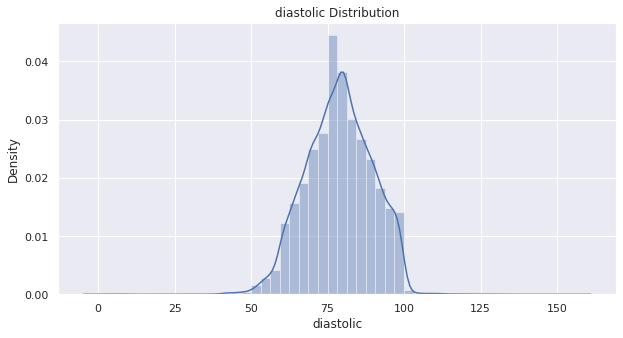

In [9]:
plt.figure(figsize=(10, 5))
plt.title('diastolic Distribution')
sns.distplot(data['diastolic'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


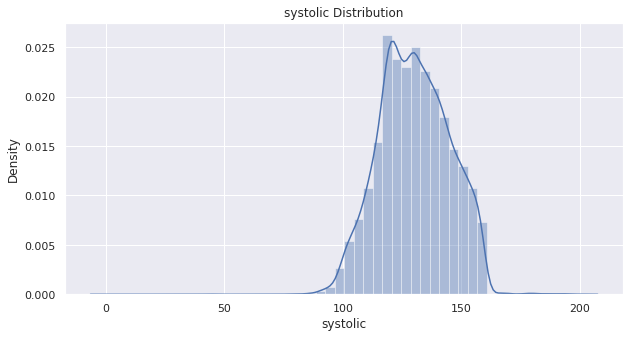

In [10]:
plt.figure(figsize=(10, 5))
plt.title('systolic Distribution')
sns.distplot(data['systolic'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


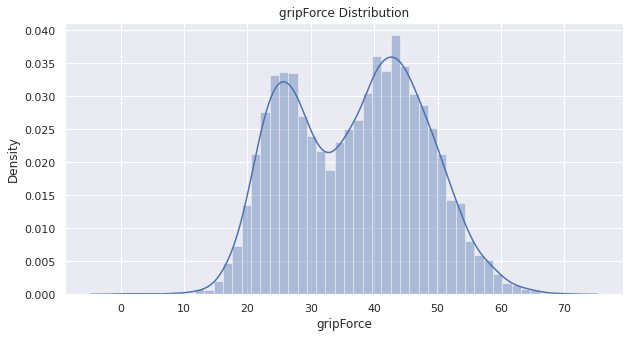

In [11]:
plt.figure(figsize=(10, 5))
plt.title('gripForce Distribution')
sns.distplot(data['gripForce'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


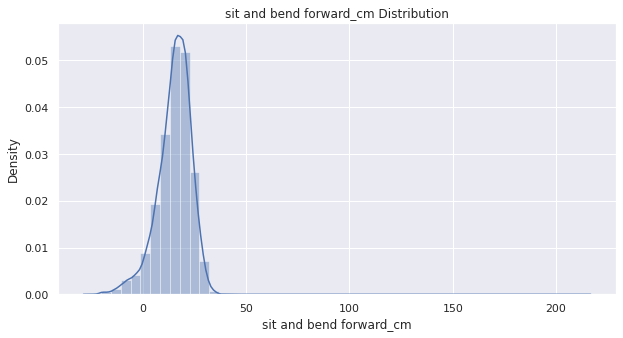

In [12]:
plt.figure(figsize=(10, 5))
plt.title('sit and bend forward_cm Distribution')
sns.distplot(data['sit and bend forward_cm'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


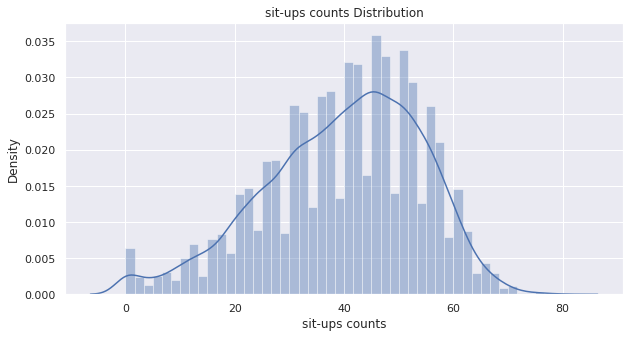

In [13]:
plt.figure(figsize=(10, 5))
plt.title('sit-ups counts Distribution')
sns.distplot(data['sit-ups counts'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


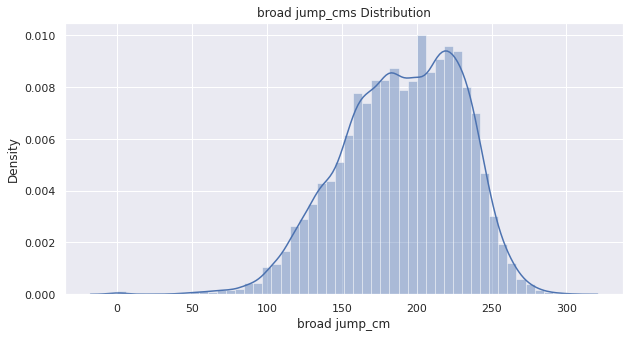

In [14]:
plt.figure(figsize=(10, 5))
plt.title('broad jump_cms Distribution')
sns.distplot(data['broad jump_cm'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


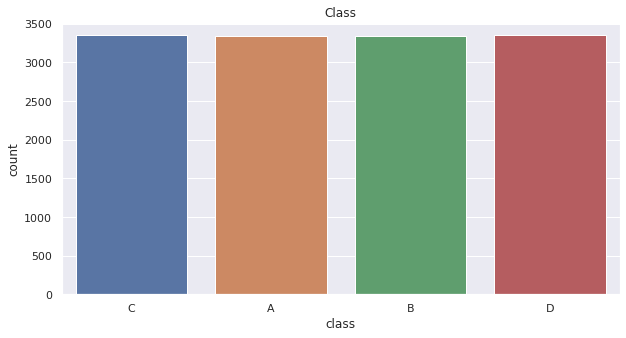

In [15]:
plt.figure(figsize=(10, 5))
plt.title('Class')
sns.countplot(data['class'])
plt.show()

# ***Data Preprocessing***

In [16]:
sex = data[['gender']]
target = data[['class']]
data.drop(columns=['gender', 'class'], axis=1, inplace=True)

In [17]:
oneHot = OneHotEncoder(sparse=False)
Sex = pd.DataFrame(oneHot.fit_transform(sex), columns=oneHot.get_feature_names())

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
ordinal = OrdinalEncoder()
Target = pd.DataFrame(ordinal.fit_transform(target), columns=['Target'])

In [19]:
scale = StandardScaler()
Data = pd.DataFrame(scale.fit_transform(data), columns=data.columns)

In [20]:
newData = pd.concat([Sex, Data, Target], axis=1)

In [21]:
corr = newData.corr()
corr['Target'].sort_values(ascending=False)

Target                     1.000000
body fat_%                 0.341956
weight_kg                  0.214129
x0_M                       0.075605
diastolic                  0.066761
age                        0.065612
height_cm                  0.037753
systolic                   0.035484
x0_F                      -0.075605
gripForce                 -0.136088
broad jump_cm             -0.262154
sit-ups counts            -0.452832
sit and bend forward_cm   -0.588123
Name: Target, dtype: float64

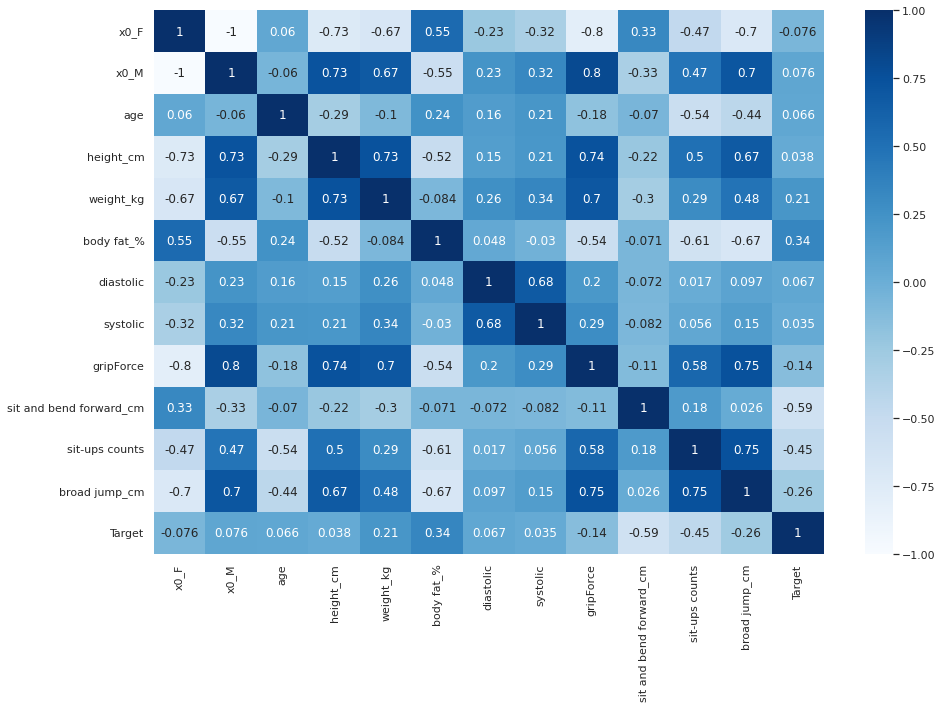

In [22]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

In [23]:
target = newData['Target']
newData.drop(columns='Target', axis=1, inplace=True)

In [24]:
newData.head(10)

,x0_F,x0_M,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,0.0,1.0,-0.717432,0.443873,0.652150,-0.267367,0.112009,-0.015959,1.688190,0.377317,1.416961,0.674009
1,0.0,1.0,-0.864220,-0.422465,-0.974734,-1.039081,-0.167278,-0.287820,-0.053073,0.128984,0.926634,0.975013
2,0.0,1.0,-0.423857,1.310211,0.883127,-0.432734,1.229158,1.479276,0.737554,-0.379509,0.646446,-0.229005
3,0.0,1.0,-0.350463,0.704961,0.305684,-0.667004,-0.260374,1.139450,0.417538,-0.001096,0.926634,0.724176
4,0.0,1.0,-0.644038,0.621888,0.021147,-0.846152,-0.818948,-0.219855,0.615195,1.406129,0.366259,0.674009
5,1.0,0.0,-0.056888,-0.374995,-1.008209,-0.170902,-1.377523,-0.763577,-1.239015,0.684778,-0.894584,-0.931349
6,1.0,0.0,0.383475,-0.481804,-0.313603,1.234720,-0.632757,0.323867,-1.342550,-1.703956,-1.525005,-1.106935
7,0.0,1.0,-0.277069,0.752432,0.816177,1.882409,0.484392,0.459797,0.841089,-0.344033,0.156119,1.100432
8,0.0,1.0,1.264200,-0.208848,0.004409,0.600812,0.577488,2.362824,0.323416,0.400968,-0.404256,-1.056767
9,0.0,1.0,-0.644038,1.951065,1.435465,-1.218229,0.205105,1.751137,1.970557,-0.367684,1.066727,0.573674


In [25]:
target.head(10)

0    2.0
1    0.0
2    2.0
3    1.0
4    1.0
5    1.0
6    3.0
7    1.0
8    2.0
9    1.0
Name: Target, dtype: float64

# ***Train Test Split***

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(newData, target, test_size=0.3, random_state=42)

# ***Model Training***

***BaggingClassifier***

In [27]:
BaggingModel = BaggingClassifier()
BaggingModel.fit(xtrain, ytrain)

BaggingClassifier()

In [28]:
bag_cv = cross_val_score(BaggingModel, newData, target, cv=5, scoring='neg_mean_squared_error')

In [29]:
print(-bag_cv)
print(np.mean(-bag_cv))

[0.48637551 0.49832027 0.46211273 0.50597461 0.51306945]
0.49317051467433615


**XGBClassifier**

In [30]:
XgbModel = XGBClassifier()
XgbModel.fit(xtrain, ytrain)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:28:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [31]:
xgb_cv = cross_val_score(XgbModel, newData, target, cv=5, scoring='neg_mean_squared_error')

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:28:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:28:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:28:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:28:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:28:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [32]:
print(-xgb_cv)
print(np.mean(-xgb_cv))

[0.42702501 0.40462859 0.40388205 0.40179238 0.41747573]
0.4109607516319918


# ***Model Evaluation***

In [33]:
def Main(modelName, model, cv):
  print(f'============ {modelName} ============')
  print('Model training error ---> ', np.mean(-cv))
  print('َAccuracy ---> ', accuracy_score(ytest, model.predict(xtest)))
  print()

In [34]:
Main('BaggingClassifier', BaggingModel, bag_cv)
Main('XGBClassifier', XgbModel, xgb_cv)

============ BaggingClassifier ============
Model training error --->  0.49317051467433615
َAccuracy --->  0.7220009955201593

============ XGBClassifier ============
Model training error --->  0.4109607516319918
َAccuracy --->  0.7578397212543554



In [35]:
votingModel = VotingClassifier(
    estimators=[('XGBClassifier', XgbModel), ('BaggingClassifier', BaggingModel)])

votingModel.fit(xtrain, ytrain)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:28:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('XGBClassifier',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            enable_categorical=False, gamma=0,
                                            gpu_id=-1, importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=4,
                                            num_parallel_tree=1,
                       

In [36]:
for model in (XgbModel, BaggingModel, votingModel):
  model.fit(xtrain, ytrain)
  ypred = model.predict(xtest)
  print(f'{model.__class__.__name__} --> {accuracy_score(ytest, ypred)}')


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:28:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier --> 0.7578397212543554
BaggingClassifier --> 0.7252364360378297
[19:28:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


VotingClassifier --> 0.7448979591836735
